In [7]:
import pandas as pd
import warnings

df = pd.read_csv('../data/arima_data.csv', names=['day', 'price'])
df.head()

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   2013-01-01  59 non-null     object
 1   3794        59 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


In [8]:
df['day'] = pd.to_datetime(df['day'], format='%Y-%m-%d')
df.set_index('day', inplace=True)
df.head(3)

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190


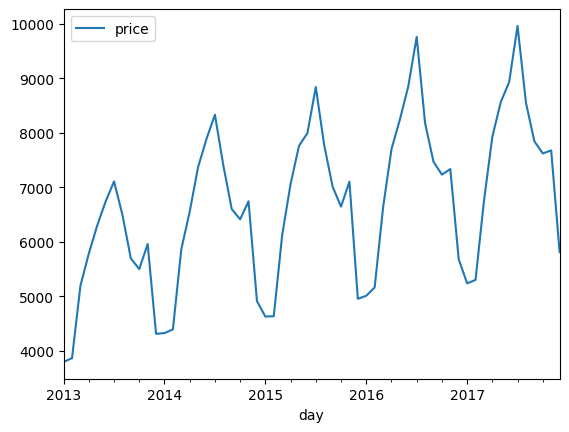

In [10]:
df.plot(kind='line');

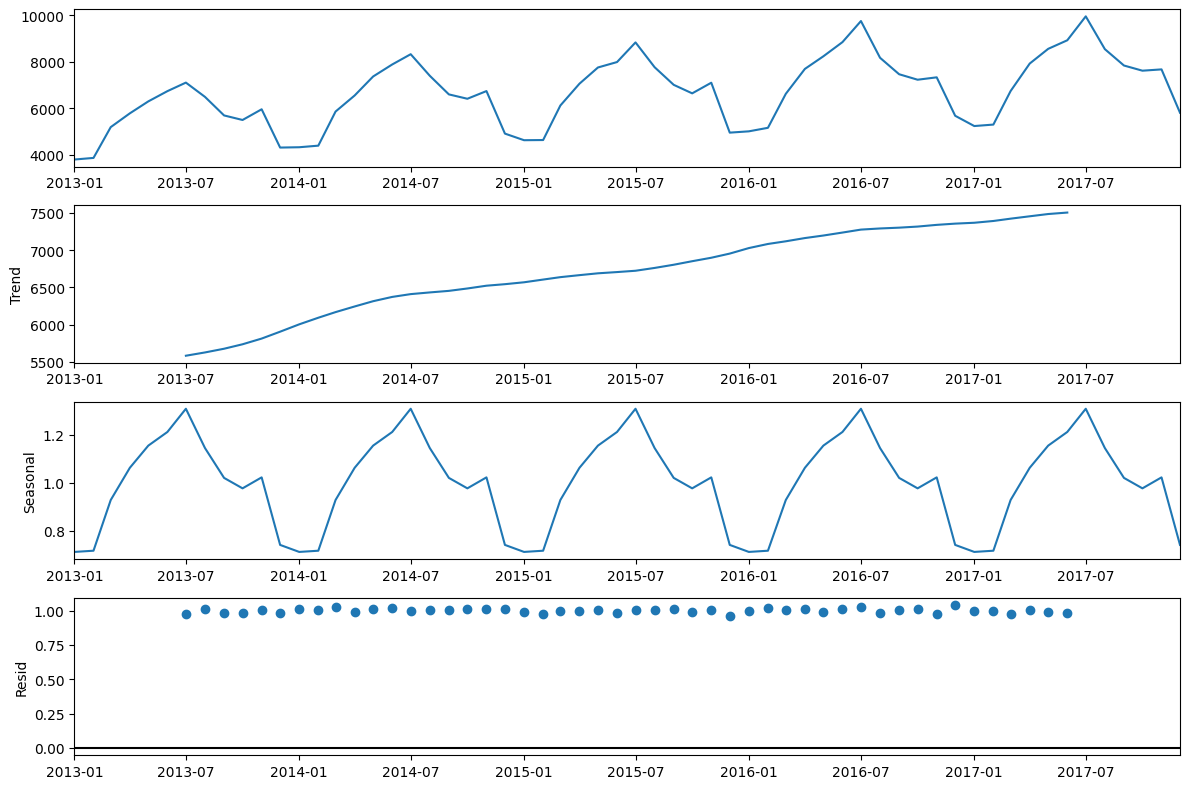

In [15]:
# 추세에 따라 계절성이 존재하므로 Multiplicative를 적용
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

ts = df
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

training = df[:'2016-12-01']
test = df.drop(training.index)

adf = adfuller(training, regression='ct')
print('ADF Statistics : ', adf[0])
print('pvalue :', adf[1])

ADF Statistics :  -1.9997199341327634
pvalue : 0.6015863303794268


<AxesSubplot:xlabel='day'>

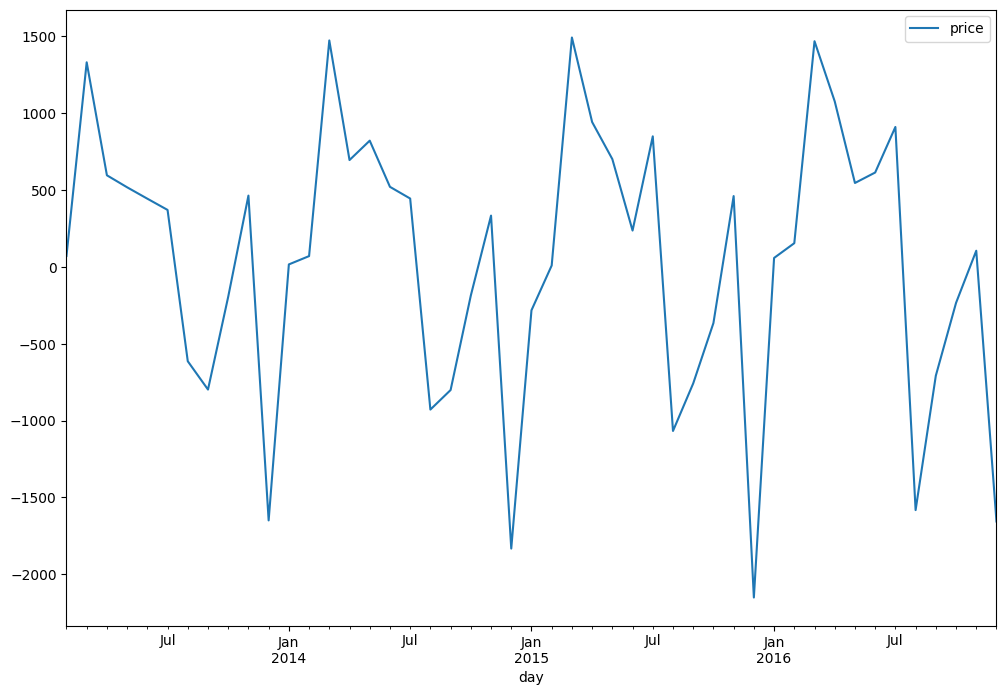

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_data = training.diff(1)
diff_data = diff_data.dropna()
diff_data.plot()

In [21]:
adf = adfuller(diff_data)
print('ADF Statistic :{:.4f}'.format(adf[0]))
print('p-value : {:.14f}'.format(adf[1]))

ADF Statistic :-12.0945
p-value : 0.00000000000000


C:\Users\82103\anaconda3\envs\ADP\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


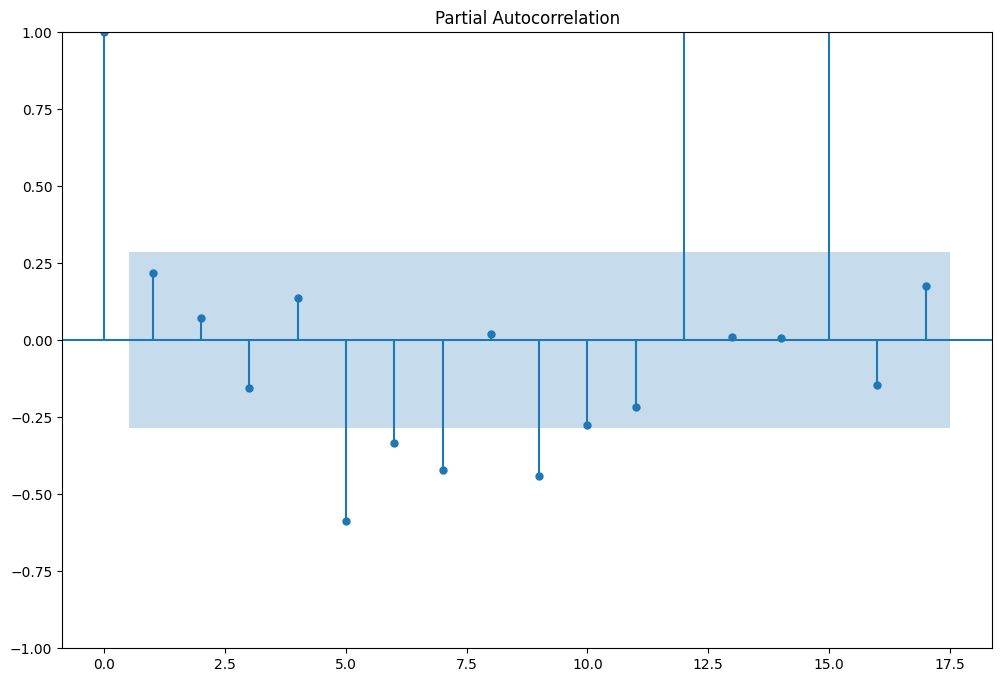

In [22]:
plot_pacf(diff_data);

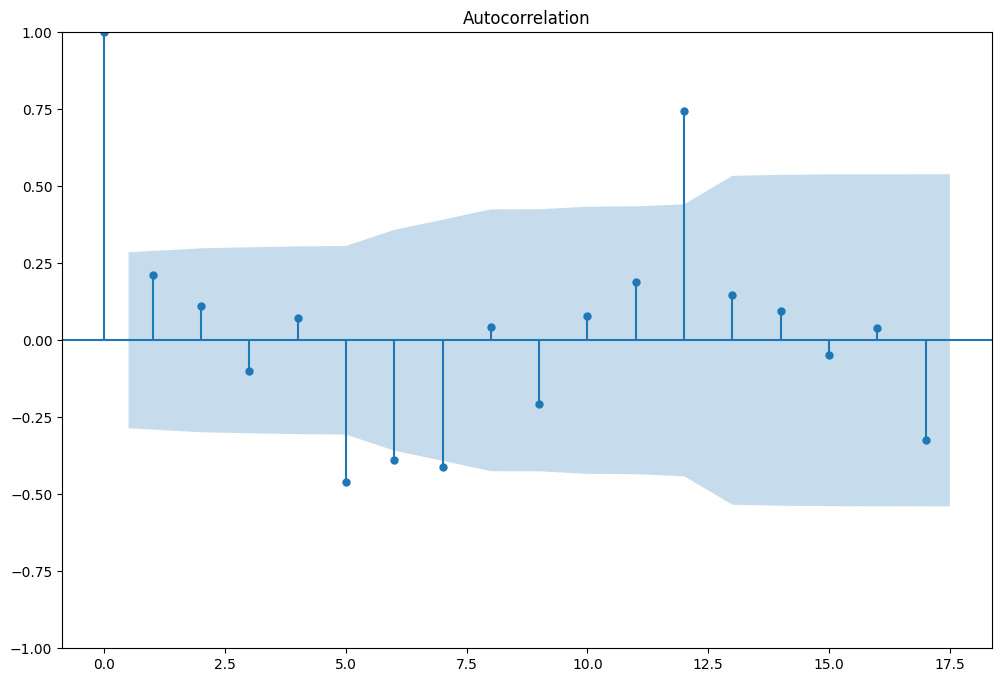

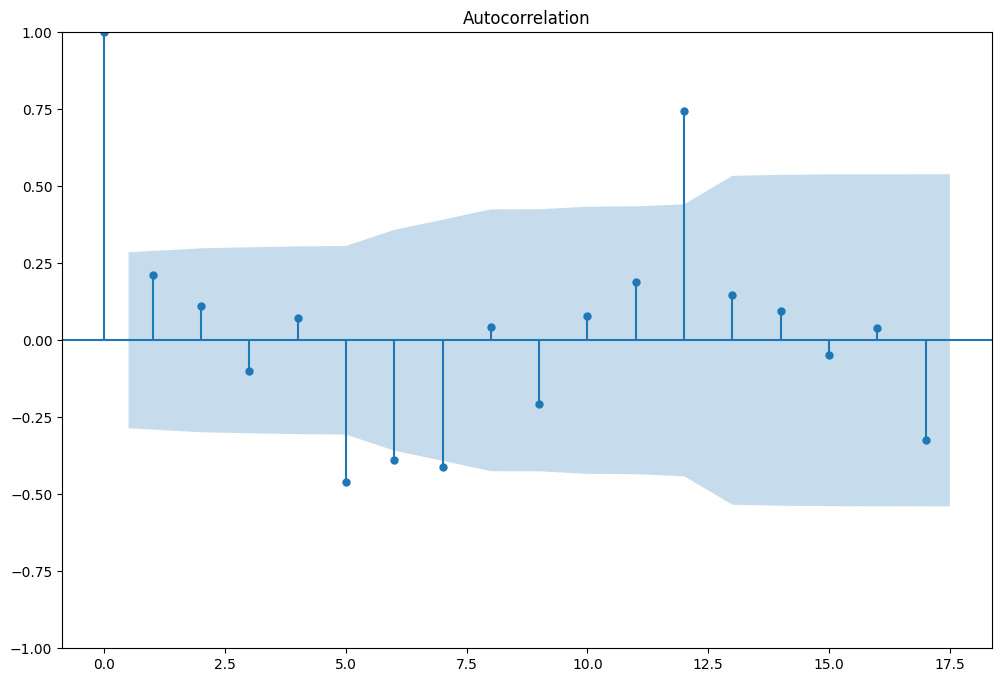

In [23]:
plot_acf(diff_data)

### ARIMA

In [26]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(training, order=(2, 1, 2))
result = model.fit()
result.summary()

C:\Users\82103\anaconda3\envs\ADP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\82103\anaconda3\envs\ADP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\82103\anaconda3\envs\ADP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\82103\anaconda3\envs\ADP\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\82103\anaconda3\envs\ADP\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -375.875
Date:                Sat, 05 Aug 2023   AIC                            761.750
Time:                        17:19:03   BIC                            771.001
Sample:                    01-01-2013   HQIC                           765.231
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3166      0.190     -6.943      0.000      -1.688      -0.945
ar.L2         -0.3190      0.190     -1.675      0.094      -0.692       0.054
ma.L1          1.9698      0.242      8.123      0.000       1.495       2.445
ma.L2          0.9948      0.241      4.126      0.000       0.522       1.467
sigma2      4.449e+05   1.14e-06   3.92e+11      0.000    4.45e+05    4.45e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.74   Prob(JB):                         0.83
Heteroskedasticity (H):               1.49   Skew:                            -0.21
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.5e+28. Standard errors may be unstable.
"""

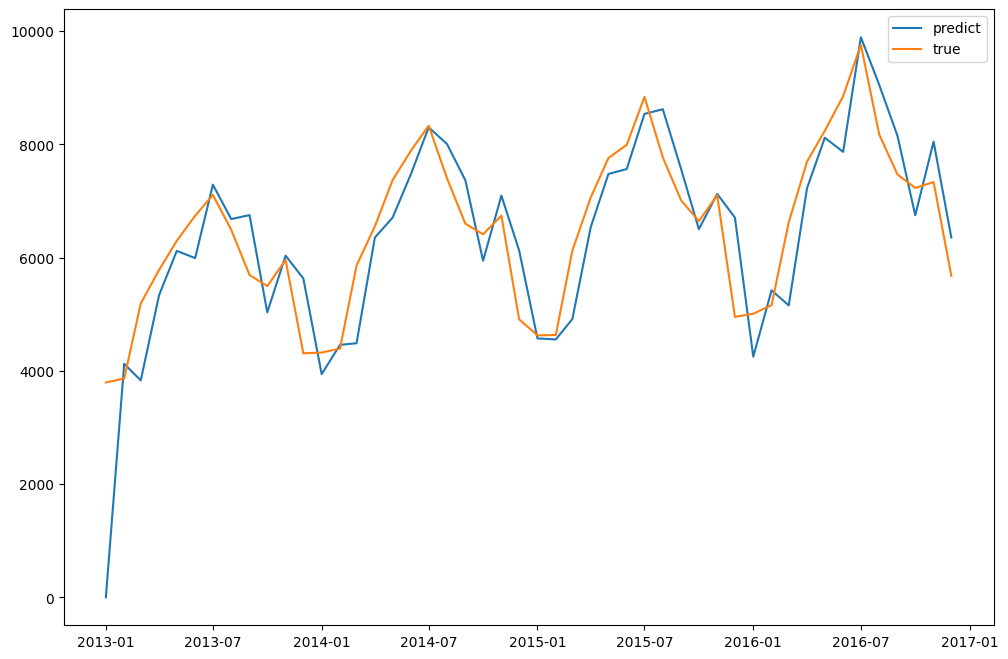

In [34]:
plt.plot(result.predict(), label='predict')
plt.plot(training, label='true')
plt.legend()
plt.show()

In [32]:
forecast_data = result.forecast(steps=len(test), alpha=0.05)

pred_y = forecast_data
pred_y

2017-01-01    5830.772788
2017-02-01    5508.607927
2017-03-01    5884.038202
2017-04-01    5492.510863
2017-05-01    5888.241156
2017-06-01    5492.111845
2017-07-01    5887.425861
2017-08-01    5493.312536
2017-09-01    5886.105094
2017-10-01    5494.668462
2017-11-01    5884.741180
2017-12-01    5496.031678
Freq: MS, Name: predicted_mean, dtype: float64

In [33]:
test_y = test

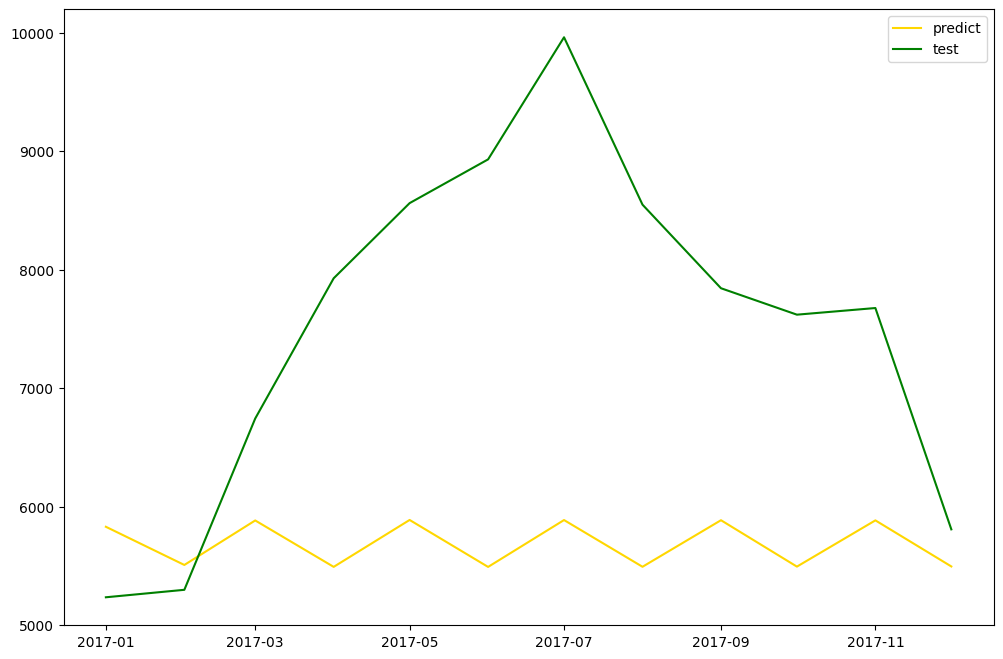

In [35]:
plt.plot(pred_y, color = 'gold', label='predict')
plt.plot(test_y, color='green', label='test')
plt.legend()
plt.show()

### SARIMA

In [36]:
!pip install pmdarima

Error processing line 1 of C:\Users\82103\anaconda3\envs\ADP\lib\site-packages\distutils-precedence.pth:

  Traceback (most recent call last):
    File "C:\Users\82103\anaconda3\envs\ADP\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named '_distutils_hack'

Remainder of file ignored


In [37]:
from pmdarima import auto_arima

In [38]:
auto_model = auto_arima(training, start_p=0, d=1, start_q=0,
                       max_p=3, max_q=3,
                       start_P=0, start_Q=0,
                       max_P=3, max_Q=3, m=12,
                       seasonal=True, information_criterion='aic',
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=481.846, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=482.652, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=482.466, Time=0.13 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=483.637, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=483.669, Time=0.05 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=481.031, Time=0.04 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=482.740, Time=0.12 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=482.616, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=482.682, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=480.687, Time=0.04 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=482.403, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=48

In [39]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -238.344
Date:                             Sat, 05 Aug 2023   AIC                            480.687
Time:                                     17:29:42   BIC                            483.798
Sample:                                 01-01-2013   HQIC                           481.761
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3185      0.177     -1.801      0.072      -0.665       0.028
sigma2      4.803e+04   1.64e+04      2.924      0.003    1.58e+04    8.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.95   Prob(JB):                         0.56
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
auto_pred_y = pd.DataFrame(auto_model.predict(n_periods=len(test)),
                          index=test.index)
auto_pred_y.columns = ['predicted_price']
auto_pred_y

,predicted_price
day,
2017-01-01,5609.436977
2017-02-01,5761.436977
2017-03-01,7225.436977
2017-04-01,8298.436977
2017-05-01,8841.436977
2017-06-01,9452.436977
2017-07-01,10359.436977
2017-08-01,8777.436977
2017-09-01,8068.436977


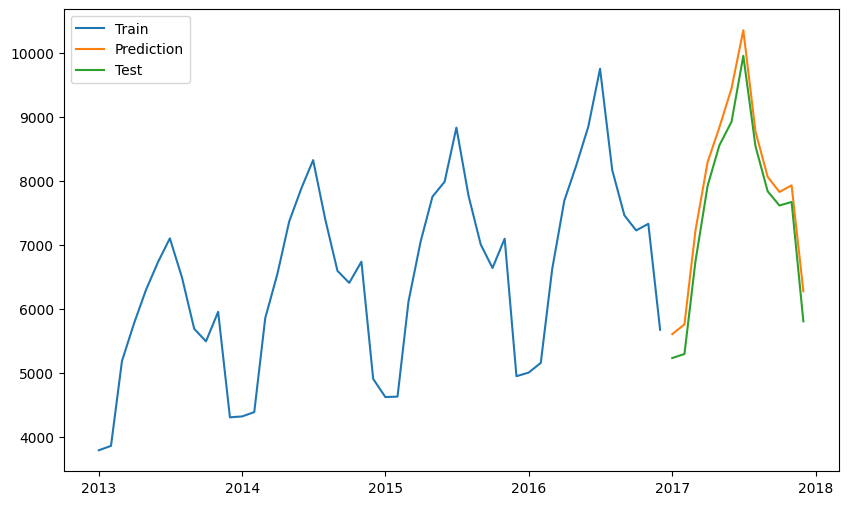

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(training, label='Train')
plt.plot(auto_pred_y, label = 'Prediction')
plt.plot(test, label='Test')
plt.legend()
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(r2_score(test_y, auto_pred_y))
print(mean_squared_error(test_y, auto_pred_y) ** 0.5)

0.9305467067543264
373.20642594043227
